<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

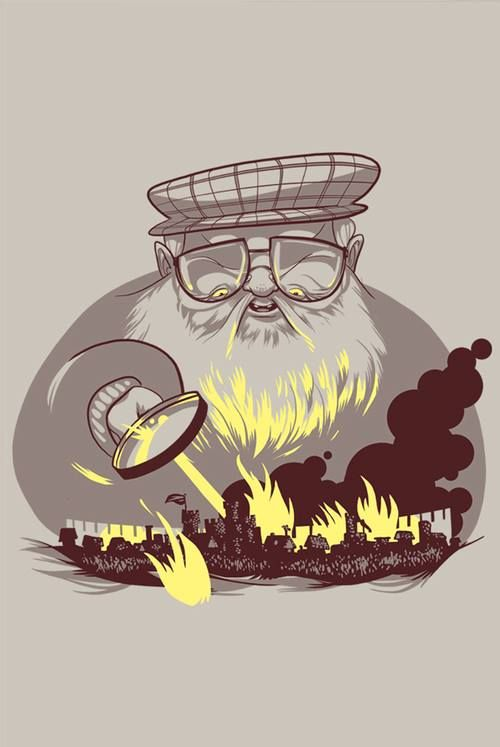

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
# !gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
# !gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v

### **Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data_init = pd.read_csv("game_of_thrones_train.csv", index_col = "S.No")

df = data_init # чтобы не изменять изначальный датасет 
df.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


### **Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

#### Какие признаки имеют много NULL элементов и не сможем восстановить медианой или средним?
Такими являются mother, father, heir, spouse.

Также не сможем восстановить соответствующие им значения
isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse.                                       

In [5]:
df = df.drop(columns = ["mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"])

In [69]:
data_init[data_init["isAliveSpouse"] == 0]["isAlive"].mean()

0.6190476190476191

count    279.000000
mean      35.290323
std       26.364864
min        0.000000
25%       16.000000
50%       24.000000
75%       49.000000
max      100.000000
Name: age, dtype: float64

#### dateOfBirth и age

Эти признаки говорят примерно об одном и том же. Посмотрим, на их зависимость и влияние на целевую переменную

Корреляция Cпирмана (мера монотонной зависимости): -0.7748300209647241


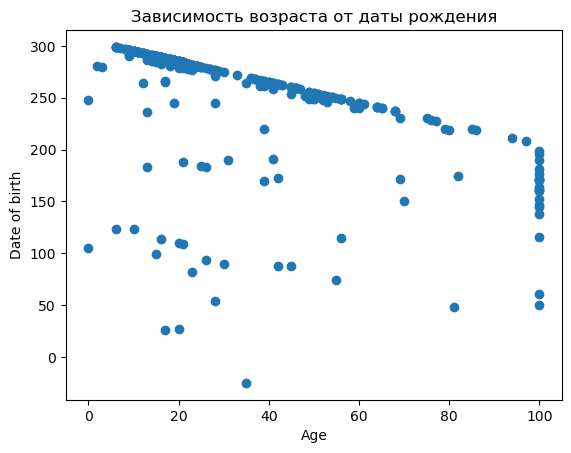

In [6]:
print(
    f"Корреляция Cпирмана (мера монотонной зависимости): {df['age'].corr(df['dateOfBirth'], 'spearman')}"
)


plt.style.use('default')
plt.scatter(df.age, df.dateOfBirth)
plt.title("Зависимость возраста от даты рождения")
plt.xlabel("Age")
plt.ylabel("Date of birth")
plt.show()

Корреляция высока. Причем, значения возраста ограничиваются 100 годами, а dateOfBirth не имеет такого ограничения. Поэтому dateOfBirth более информативный.

Рассмотрим их влияние на целевую переменную.


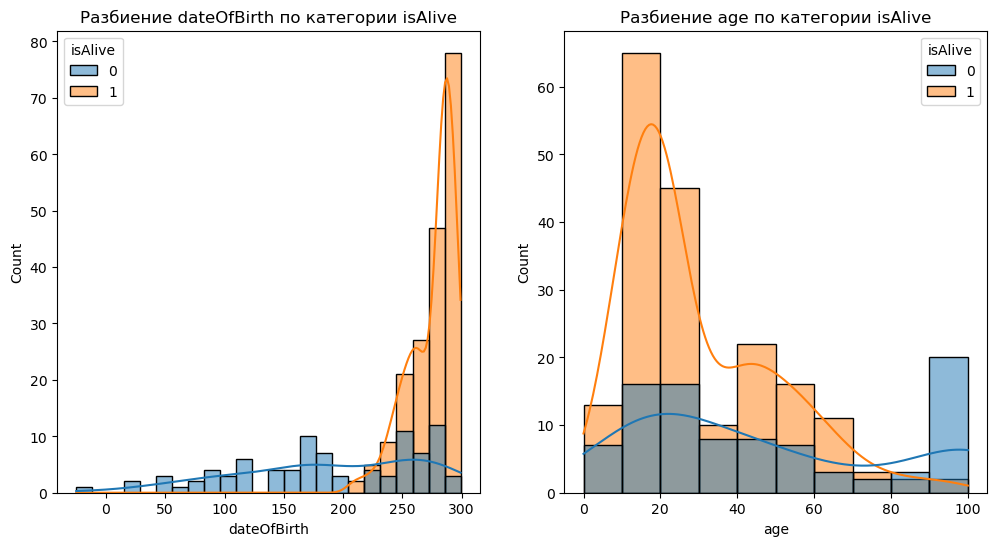

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='dateOfBirth', kde=True, hue='isAlive', ax = axes[0])
axes[0].set_title("Разбиение dateOfBirth по категории isAlive")
# axes[0].axvline(df["dateOfBirth"].mean(), color="red")




sns.histplot(data=df, x='age', kde=True, hue='isAlive', ax = axes[1])
axes[1].set_title("Разбиение age по категории isAlive")



plt.show()

По виду графиков заметно, что распределения отличаются в зависимости от категории isAlive. Поэтому нужно оставить хотя бы один из этих признаков. 

Но, опять же, значения для dateOfBirth более информативные. Поэтому, оставим его, а age выкинем.

И заполним пропущенные значения медианой

In [8]:
df = df.drop(columns = ["age"])

In [9]:
print(f"Среднее dateOfBirth: { df['dateOfBirth'].mean() }")
print(f"Медиана dateOfBirth: {df['dateOfBirth'].median()}")

Среднее dateOfBirth: 247.55197132616487
Медиана dateOfBirth: 272.0


In [10]:
df["dateOfBirth"] = df["dateOfBirth"].fillna(df['dateOfBirth'].median())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       1557 non-null   float64
 5   house             1176 non-null   object 
 6   book1             1557 non-null   int64  
 7   book2             1557 non-null   int64  
 8   book3             1557 non-null   int64  
 9   book4             1557 non-null   int64  
 10  book5             1557 non-null   int64  
 11  isMarried         1557 non-null   int64  
 12  isNoble           1557 non-null   int64  
 13  numDeadRelations  1557 non-null   int64  
 14  popularity        1557 non-null   float64
 15  isAlive           1557 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usag

#### name и house

In [12]:
df[['name', "house"]].head(10)

,name,house
S.No,,
1,Viserys II Targaryen,NaN
2,Walder Frey,House Frey
3,Addison Hill,House Swyft
4,Aemma Arryn,House Arryn
5,Sylva Santagar,House Santagar
6,Tommen Baratheon,NaN
7,Valarr Targaryen,House Targaryen
8,Viserys I Targaryen,NaN
9,Wilbert,NaN


Чисто визуально можем увидеть сходство в фамилии персонажа и его доме. 

Проверим, насколько часто совпадает дом и фамилия у персонажей, у которых и то, и другое не nan.

In [13]:
df_tmp = df[['name', "house"]]

df_tmp = df_tmp.dropna() # очистка от nan
df_tmp["name"] = df_tmp["name"].apply(lambda x: x.split()[-1]) # оставляем только фамилию
df_tmp["house"] = df_tmp["house"].apply(lambda x: x.split()[-1]) # оставляем только название дома

not_equals_arr = df_tmp["house"] != df_tmp["name"]
print(f"accuracy: {1 - not_equals_arr.sum() / len(not_equals_arr)}")



accuracy: 0.602891156462585


Это сильно лучше, чем случайно или все nan проставить модой.

Так что проставим пропущенные значения фамилией. А в колонке name в оставим только фамилии

In [14]:
df["name"] = df["name"].apply(lambda x: x.split()[-1])

df["house"] = df.apply(
    lambda x: x["house"].split()[-1] if (not pd.isna(x["house"])) else x["name"], axis = 1
)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       1557 non-null   float64
 5   house             1557 non-null   object 
 6   book1             1557 non-null   int64  
 7   book2             1557 non-null   int64  
 8   book3             1557 non-null   int64  
 9   book4             1557 non-null   int64  
 10  book5             1557 non-null   int64  
 11  isMarried         1557 non-null   int64  
 12  isNoble           1557 non-null   int64  
 13  numDeadRelations  1557 non-null   int64  
 14  popularity        1557 non-null   float64
 15  isAlive           1557 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usag

#### title

In [16]:
pd.value_counts(df["title"])

title
Ser                   306
Maester                29
Archmaester            21
Lord                   19
Septon                 16
                     ... 
Sweetport Sound         1
Lord of Greyshield      1
Felwood                 1
Goldgrass               1
Highgarden              1
Name: count, Length: 195, dtype: int64

Модой признака title является "Ser".

In [17]:
tmp = df[df["title"] == "Ser"]["isAlive"]
print(f"Отношение количества живых к общему числу по title == Ser: {tmp.sum() / len(tmp)}")

tmp = df[pd.isna(df["title"])]["isAlive"]
print(f"Отношение количества живых к общему числу по title == nan: {tmp.sum() / len(tmp)}")

tmp = df["isAlive"] 
print(f"Отношение количества живых к общему числу: {tmp.sum() / len(tmp)}")

tmp = df[(df["title"] == "Ser") + pd.isna(df["title"])]["isAlive"]
print(f"Отношение количества живых к общему числу по title == nan or title == Ser: {tmp.sum() / len(tmp)}")

Отношение количества живых к общему числу по title == Ser: 0.7745098039215687
Отношение количества живых к общему числу по title == nan: 0.8
Отношение количества живых к общему числу: 0.7784200385356455
Отношение количества живых к общему числу по title == nan or title == Ser: 0.7931937172774869


Что это значит? Распределение признаков по целевой переменной у тех персонажей, которых называют "Ser", отличается от распределения относительно nan. 
Фактически, это говорит о том, что nan реже умирают, чем Ser. Последняя строчка в выводе предыдущей ячейки указывает, что мы изменим распределение, если объединим к nan и Ser.
 Поэтому не будем приводить nan значения к Ser (то есть по моде). 
Просто оставим эти значения как nan.

In [18]:
df["title"] = df["title"].fillna("nan")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       1557 non-null   float64
 5   house             1557 non-null   object 
 6   book1             1557 non-null   int64  
 7   book2             1557 non-null   int64  
 8   book3             1557 non-null   int64  
 9   book4             1557 non-null   int64  
 10  book5             1557 non-null   int64  
 11  isMarried         1557 non-null   int64  
 12  isNoble           1557 non-null   int64  
 13  numDeadRelations  1557 non-null   int64  
 14  popularity        1557 non-null   float64
 15  isAlive           1557 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usag

#### Culture

In [20]:
pd.value_counts(df["culture"])

culture
Northmen                   94
Ironborn                   91
Free Folk                  45
Braavosi                   39
Valyrian                   28
Dothraki                   17
Ghiscari                   17
Dornish                    17
Reach                      13
Vale mountain clans        12
Valemen                    10
Rivermen                   10
northmen                    9
Westerman                   8
Free folk                   7
Tyroshi                     6
Qartheen                    5
Astapori                    4
Stormlands                  4
Summer Isles                4
Westeros                    3
Dornishmen                  3
Northern mountain clans     3
Ironmen                     3
Westermen                   3
Crannogmen                  2
Myrish                      2
Sistermen                   2
Meereenese                  2
First Men                   2
westermen                   2
Lysene                      2
Dorne                       1
Wi

Здесь ситуация, фактически, та же, что и для title. Только еще хуже)

Тут достаточно много значений, схожих с модой. Поэтому также оставим как nan

In [21]:
df["culture"] = df["culture"].fillna("nan")

### **Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [22]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Other': ['nan']
}


# ...
def func(y):
    x = y["culture"]
    for c in cult:
        if x in cult[c]:
            return c
    return(x)

In [23]:
data_curr = pd.concat(
    [df, pd.DataFrame(
        {"isPopular": df.apply(
            lambda x: True if x["popularity"] > 0.5 else False, axis = 1
        ),
        "boolDeadRelations": df.apply(
            lambda x: True if x["numDeadRelations"] > 0 else False, axis = 1
        ),
        "cult": df.apply(
            func, axis = 1
        )
        }
    )], axis = 1
)

df = data_curr

### **Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        1557 non-null   float64
 5   house              1557 non-null   object 
 6   book1              1557 non-null   int64  
 7   book2              1557 non-null   int64  
 8   book3              1557 non-null   int64  
 9   book4              1557 non-null   int64  
 10  book5              1557 non-null   int64  
 11  isMarried          1557 non-null   int64  
 12  isNoble            1557 non-null   int64  
 13  numDeadRelations   1557 non-null   int64  
 14  popularity         1557 non-null   float64
 15  isAlive            1557 non-null   int64  
 16  isPopular          1557 non-n

In [25]:
df.drop(columns=["name", "culture", "popularity", "numDeadRelations"], inplace = True)

In [26]:
# sns.pairplot(df, hue='isAlive', palette={0: 'red', 1: 'blue'})
# plt.suptitle('Попарные scatterplots с разделением по isAlive', y=1.02)
# plt.show()

### **Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Датасет не является сбалансированным по классам. Целевая переменная является категориальной

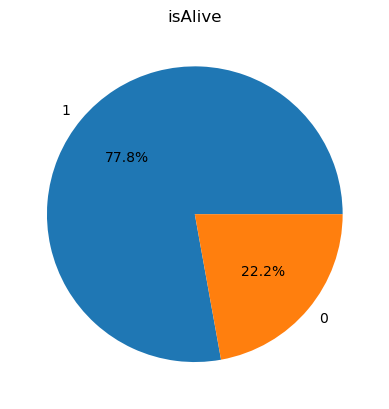

In [27]:
tmp = pd.value_counts(df["isAlive"])
plt.pie(tmp, autopct='%1.1f%%', labels=tmp.index)
plt.title("isAlive");

### **Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   dateOfBirth        1557 non-null   float64
 3   house              1557 non-null   object 
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isMarried          1557 non-null   int64  
 10  isNoble            1557 non-null   int64  
 11  isAlive            1557 non-null   int64  
 12  isPopular          1557 non-null   bool   
 13  boolDeadRelations  1557 non-null   bool   
 14  cult               1557 non-null   object 
dtypes: bool(2), float64(1), int64(9), object(3)
memory usage: 173.3+ KB


In [29]:
df_quantitative_colnames = ["dateOfBirth"]
df_categorical_colnames = df.drop(columns=df_quantitative_colnames).columns.tolist()

#### title

In [30]:
title_counts = pd.value_counts(df["title"])
title_counts.head(20)

title
nan                                    840
Ser                                    306
Maester                                 29
Archmaester                             21
Lord                                    19
Septon                                  16
Winterfell                              15
Lady                                    10
King in the North                        9
Princess                                 9
Septa                                    9
Cupbearer                                8
Lord Commander of the Night's Watch      8
Prince                                   7
Grand Maester                            6
Khal                                     5
Wisdom                                   5
Prince of Dragonstone                    4
King-Beyond-the-Wall                     4
Lord of the Tides                        3
Name: count, dtype: int64

Преобразуем все титулы, которых менее 15 к одному признаку титлу "other"

In [31]:
df["title"] = df["title"].apply(lambda x: x if title_counts[x] > 15 else "other")
pd.value_counts(df["title"])

title
nan            840
other          326
Ser            306
Maester         29
Archmaester     21
Lord            19
Septon          16
Name: count, dtype: int64

#### house

In [32]:
house_counts = pd.value_counts(df["house"])
house_counts.head(20)

house
Frey         91
Watch        90
Stark        60
Targaryen    54
Lannister    37
Tyrell       35
Greyjoy      31
Osgrey       20
Seven        15
Hightower    12
Botley       12
Martell      12
Florent      11
Arryn        11
Crakehall    10
Bracken       9
Waynwood      9
Baratheon     9
Wylde         8
Velaryon      8
Name: count, dtype: int64

In [33]:
df["house"] = df["house"].apply(lambda x: x if house_counts[x] > 15 else "other")
pd.value_counts(df["house"])

house
other        1139
Frey           91
Watch          90
Stark          60
Targaryen      54
Lannister      37
Tyrell         35
Greyjoy        31
Osgrey         20
Name: count, dtype: int64

#### cult

In [34]:
cult_counts = pd.value_counts(df["cult"])
cult_counts.head(20)

cult
Other                  1069
Northmen                103
Ironborn                 91
Free Folk                46
Braavosi                 39
Valyrian                 28
Ghiscari                 17
Dornish                  17
Dothraki                 17
Reach                    13
Vale mountain clans      12
Rivermen                 10
Valemen                  10
Westerman                 8
Free folk                 7
Tyroshi                   6
Qartheen                  5
Westermen                 5
Summer Isles              4
Stormlands                4
Name: count, dtype: int64

In [35]:
df["cult"] = df["cult"].apply(lambda x: x if cult_counts[x] > 15 else "other")
pd.value_counts(df["cult"])    

cult
Other        1069
other         130
Northmen      103
Ironborn       91
Free Folk      46
Braavosi       39
Valyrian       28
Dornish        17
Dothraki       17
Ghiscari       17
Name: count, dtype: int64

### **Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [36]:
# Группируем по категории и считаем среднее значение целевой переменной
for category in df_categorical_colnames:
    category_means = df.groupby(category)['isAlive'].mean()
    print(category_means)
    print()

title
Archmaester    1.000000
Lord           0.684211
Maester        0.896552
Septon         0.750000
Ser            0.774510
nan            0.800000
other          0.708589
Name: isAlive, dtype: float64

male
0    0.852433
1    0.727174
Name: isAlive, dtype: float64

house
Frey         0.890110
Greyjoy      0.612903
Lannister    0.702703
Osgrey       0.750000
Stark        0.766667
Targaryen    0.222222
Tyrell       0.942857
Watch        0.566667
other        0.815628
Name: isAlive, dtype: float64

book1
0    0.797166
1    0.662037
Name: isAlive, dtype: float64

book2
0    0.794651
1    0.745098
Name: isAlive, dtype: float64

book3
0    0.771751
1    0.787202
Name: isAlive, dtype: float64

book4
0    0.64464
1    0.88242
Name: isAlive, dtype: float64

book5
0    0.768936
1    0.797665
Name: isAlive, dtype: float64

isMarried
0    0.786293
1    0.725000
Name: isAlive, dtype: float64

isNoble
0    0.800687
1    0.750000
Name: isAlive, dtype: float64

isAlive
0    0.0
1    1.0
Name: isAli

Среднее по выживаемости отличается для всех категорий и всех категориальных переменных

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   dateOfBirth        1557 non-null   float64
 3   house              1557 non-null   object 
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isMarried          1557 non-null   int64  
 10  isNoble            1557 non-null   int64  
 11  isAlive            1557 non-null   int64  
 12  isPopular          1557 non-null   bool   
 13  boolDeadRelations  1557 non-null   bool   
 14  cult               1557 non-null   object 
dtypes: bool(2), float64(1), int64(9), object(3)
memory usage: 173.3+ KB


In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

unprocessed_cat_features = ["title", "house", "cult"]

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=df.index)

In [39]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df_encoded

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,...,cult_Braavosi,cult_Dornish,cult_Dothraki,cult_Free Folk,cult_Ghiscari,cult_Ironborn,cult_Northmen,cult_Other,cult_Valyrian,cult_other
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,208.0,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,272.0,0,0,0,1,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,82.0,0,0,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0,276.0,0,0,0,1,0,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,272.0,1,0,1,1,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1554,0,272.0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1555,1,272.0,0,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### **Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [40]:
X = df_encoded.drop(columns = ["isAlive"])
y = df_encoded["isAlive"]

### **Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)


from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

### **Final**. Объединение всех предыдущих шагов в одну функцию

In [356]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np


# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'nan': ['nan']
}


def func(y):
    x = y["culture"]
    for c in cult:
        if x in cult[c]:
            return c
    return(x)


class PrepareData:

    def __init__(self):
        pass

    def fit(self, data_frame: pd.DataFrame):
        df = data_frame

        self.drop_cols = ["mother", "father", "heir", "spouse", "isAliveMother"]

        df = df.drop(columns = self.drop_cols)

        # df = df.drop(columns = ["age"])
        self.age = df['age'].median()
        df["age"] = df["age"].fillna(self.age)
        

        self.dateOfBirth_mean = df['dateOfBirth'].median()
        df["dateOfBirth"] = df["dateOfBirth"].fillna(self.dateOfBirth_mean)
        

        df["name"] = df["name"].apply(lambda x: x.split()[-1])
        # df["house"] = df.apply(
        #     lambda x: x["house"].split()[-1] if (not pd.isna(x["house"])) else x["name"], axis = 1
        # )
        df["house"] = df["house"].fillna("nan")

        df["title"] = df["title"].fillna("nan")

        df["culture"] = df["culture"].fillna("nan")

        df = pd.concat(
            [df, pd.DataFrame(
                {"isPopular": df.apply(
                    lambda x: True if x["popularity"] > 0.5 else False, axis = 1
                ),
                "boolDeadRelations": df.apply(
                    lambda x: True if x["numDeadRelations"] > 0 else False, axis = 1
                ),
                "cult": df.apply(
                    func, axis = 1
                )
                }
            )], axis = 1
        )

        self.drop_cols2 = ["name", "culture", "isPopular", "numDeadRelations"]
        df.drop(columns=self.drop_cols2, inplace = True)

        title_counts = pd.value_counts(df["title"])
        df["title"] = df["title"].apply(lambda x: x if title_counts[x] > 10 else "other")
        self.title = pd.unique(df["title"])

        house_counts = pd.value_counts(df["house"])
        # print(house_counts[1:20])
        df["house"] = df["house"].apply(lambda x: x if house_counts[x] > 10 else "other")
        self.house = pd.unique(df["house"])

        cult_counts = pd.value_counts(df["cult"])
        df["cult"] = df["cult"].apply(lambda x: x if cult_counts[x] > 10 else "other")
        self.cult = pd.unique(df["cult"])

        df.fillna(value = -1, inplace=True)

        encoder = OneHotEncoder(sparse_output=False)
        unprocessed_cat_features = ["title", "house", "cult", "isAliveSpouse"]
        encoder = encoder.fit(df[unprocessed_cat_features])
        one_hot_encoded = encoder.transform(df[unprocessed_cat_features])
        one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=df.index)
        self.encoder = encoder

        
        df_encoded = pd.concat([df, one_hot_df], axis=1)
        df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

        
        
        return df_encoded
    

    def transform(self, data_frame: pd.DataFrame):
        df = data_frame

        df = df.drop(columns = self.drop_cols)

        # df = df.drop(columns = ["age"])
        df["age"] = df["age"].fillna(self.age)
        
        df["dateOfBirth"] = df["dateOfBirth"].fillna(self.dateOfBirth_mean)

        df["name"] = df["name"].apply(lambda x: x.split()[-1])
        # df["house"] = df.apply(
        #     lambda x: x["house"].split()[-1] if (not pd.isna(x["house"])) else x["name"], axis = 1
        # )
        df["house"] = df["house"].fillna("nan")

        df["title"] = df["title"].fillna("nan")

        df["culture"] = df["culture"].fillna("nan")

        df = pd.concat(
            [df, pd.DataFrame(
                {"isPopular": df.apply(
                    lambda x: True if x["popularity"] > 0.5 else False, axis = 1
                ),
                "boolDeadRelations": df.apply(
                    lambda x: True if x["numDeadRelations"] > 0 else False, axis = 1
                ),
                "cult": df.apply(
                    func, axis = 1
                )
                }
            )], axis = 1
        )

        df.drop(columns=self.drop_cols2, inplace = True)

        df["title"] = df["title"].apply(lambda x: x if x in self.title else "other")

        df["house"] = df["house"].apply(lambda x: x if x in self.house else "other")

        df["cult"] = df["cult"].apply(lambda x: x if x in self.cult else "other")

        df.fillna(value = -1, inplace=True)

        unprocessed_cat_features = ["title", "house", "cult", "isAliveSpouse"]
        one_hot_encoded = self.encoder.transform(df[unprocessed_cat_features])
        one_hot_df = pd.DataFrame(one_hot_encoded, columns=self.encoder.get_feature_names_out(unprocessed_cat_features), index=df.index)


        
        df_encoded = pd.concat([df, one_hot_df], axis=1)
        df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)
        
        return df_encoded


In [357]:
from sklearn import preprocessing


df_train, df_test = train_test_split(data_init, shuffle=True, test_size=0.2, random_state=44)

data_preparer = PrepareData()

df_train_prepared = data_preparer.fit(df_train)
X_train = df_train_prepared.drop(columns = ["isAlive"]).values
y_train = df_train_prepared["isAlive"].values



df_test_prepared = data_preparer.transform(df_test)
X_test = df_test_prepared.drop(columns = ["isAlive"]).values
y_test = df_test_prepared["isAlive"].values


scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [358]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=8, max_depth=5)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)



Accuracy : 0.8269
Precision : 0.8203
Roc auc score : 0.6139


In [382]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


clf = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=4), n_estimators=300,  random_state=43
                         , learning_rate=0.5
                         )
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Accuracy : 0.8750
Precision : 0.8835
Roc auc score : 0.7589


In [383]:
data_submission = pd.read_csv("game_of_thrones_test.csv", index_col = "S.No")

data_submission_prepared = data_preparer.transform(data_submission)

X_submission = data_submission_prepared.values

X_submission_scaled = scaler.transform(X_submission)

submission = pd.read_csv("submission.csv", index_col='S.No')

submission["isAlive"] = clf.predict(X_submission_scaled)

submission.to_csv("new_submission.csv", index=False)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [45]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [46]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, class_weight="balanced")

# Шаг 2. обучение модели
logistic_regression.fit(X_train_scaled, y_train)

clf = logistic_regression

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

print(y_pred)
print(y_test.mean())





#----------------------------------------------------------------------------------------------------------------
data_submission = pd.read_csv("game_of_thrones_test.csv", index_col = "S.No")

data_submission_prepared = data_preparer.transform(data_submission)

X_submission = data_submission_prepared.values

X_submission_scaled = scaler.transform(X_submission)

submission = pd.read_csv("submission.csv", index_col='S.No')

submission["isAlive"] = logistic_regression.predict(X_submission_scaled)

submission.to_csv("new_submission.csv", index=False)



Accuracy : 0.7019
Precision : 0.9032
Roc auc score : 0.7152
[0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0
 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0
 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0
 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1]
0.7788461538461539


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

### AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score



# Создание базового классификатора (дерева решений)
base_est = DecisionTreeClassifier()

# Создание AdaBoostClassifier с базовым классификатором
adaboost = AdaBoostClassifier(estimator=base_est)

# Определение сетки параметров для GridSearch
param_grid = {
    'estimator__max_depth': [1, 2, 3],  # Параметры для DecisionTreeClassifier
    'estimator__min_samples_split': [2, 5],
    'n_estimators': [100, 200],  # Параметры для AdaBoostClassifier
    'learning_rate': [0.01, 1.0]
}


# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)

# Обучение модели с использованием GridSearchCV
grid_search.fit(X_train_scaled, y_train)

best_adaboost = grid_search.best_estimator_

y_pred = best_adaboost.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)


Accuracy : 0.8558


In [80]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

y_pred = best_adaboost.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

clf = best_adaboost

grid_search.best_params_

ValueError: X has 45 features, but AdaBoostClassifier is expecting 42 features as input.

In [146]:
data_submission = pd.read_csv("game_of_thrones_test.csv", index_col = "S.No")

data_submission_prepared = data_preparer.transform(data_submission)

X_submission = data_submission_prepared.values

X_submission_scaled = scaler.transform(X_submission)

submission = pd.read_csv("submission.csv", index_col='S.No')

submission["isAlive"] = clf.predict(X_submission_scaled)

submission.to_csv("new_submission.csv", index=False)

In [149]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


clf = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=3), n_estimators=500,  random_state=43)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Accuracy : 0.8590
Precision : 0.8592
Roc auc score : 0.7071


--------------------------------------------------------------------------------

In [52]:
from sklearn import preprocessing


data_preparer = PrepareData()

df_train_prepared = data_preparer.fit(data_init)
X_train = df_train_prepared.drop(columns = ["isAlive"]).values
y_train = df_train_prepared["isAlive"].values


scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)


#------------------

clf = AdaBoostClassifier(estimator = DecisionTreeClassifier(), n_estimators=150,  random_state=43)
clf.fit(X_train_scaled, y_train)



#-----------------

data_submission = pd.read_csv("game_of_thrones_test.csv", index_col = "S.No")

data_submission_prepared = data_preparer.transform(data_submission)

X_submission = data_submission_prepared.values

X_submission_scaled = scaler.transform(X_submission)

submission = pd.read_csv("submission.csv", index_col='S.No')

submission["isAlive"] = clf.predict(X_submission_scaled)

submission.to_csv("new_submission.csv", index=False)



--------------------------------------------------------------------------------

### RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(random_state=0, n_estimators=200, n_jobs=8, oob_score=True)

clf.fit(X_train_scaled, y_train)

clf.oob_score_





0.7959839357429719

In [55]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Accuracy : 0.8109
Precision : 0.8538
Roc auc score : 0.6814


### GaussianProcessClassifier

In [56]:
from sklearn.gaussian_process import GaussianProcessClassifier


clf = GaussianProcessClassifier()

clf.fit(X_train_scaled, y_train)


GaussianProcessClassifier()

In [57]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

Accuracy : 0.8237
Precision : 0.8588
Roc auc score : 0.6948


In [58]:
from sklearn.svm import SVC

c = [0.1, 0.3, 0.5, 0.7, 0.9]
gamma = [0.1, 0.3, 0.5, 0.7, 0.9]
kernel = ['rbf','linear']

hyper_parameters = {'kernel': kernel, 'C': c, 'gamma': gamma}

grid_search = GridSearchCV(estimator=SVC(), param_grid=hyper_parameters, cv=5, n_jobs=8)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=8,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'kernel': ['rbf', 'linear']})

In [59]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score


clf = grid_search.best_estimator_


y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision : %.4f" % precision)

scr = roc_auc_score(y_test, y_pred)
print("Roc auc score : %.4f" % scr)

grid_search.best_params_

Accuracy : 0.8237
Precision : 0.8219
Roc auc score : 0.6170


{'C': 0.3, 'gamma': 0.1, 'kernel': 'linear'}

## Сохранение 

In [187]:
data_submission = pd.read_csv("game_of_thrones_test.csv", index_col = "S.No")

data_submission_prepared = data_preparer.transform(data_submission)

X_submission = data_submission_prepared.values

X_submission_scaled = scaler.transform(X_submission)

submission = pd.read_csv("submission.csv", index_col='S.No')

submission["isAlive"] = clf.predict(X_submission_scaled)

submission.to_csv("new_submission.csv", index=False)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [48]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [60]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7019


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [221]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: c:\Users\nik1m\Desktop\Прога\DLS_sem1\hw_1_game_of_thrones\submission.csv

  0%|          | 0.00/2.74k [00:00<?, ?B/s]
100%|██████████| 2.74k/2.74k [00:00<00:00, 225kB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)